# Importing Libraries

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
%run "Stock Data.ipynb".ipynb
%run "Binance API.ipynb".ipynb
%run "RiskMetrics.ipynb".ipynb
%run "PnL Computation.ipynb".ipynb

# Importing Data

## Tickers

In [6]:
binance_api_key='E90xR7UnO2oeP3lrgC50zkqUuAqyyXs4uSlAGcqIVO9n90ELrFI4gfVI2HGGxxCj'
binance_api_secret='Inls2xYl9FqPi0zlIrucfxG81drx7w6Pv6SzYFxMNoAcwDjlCKug7zUM9zB3lF9h'
Binance=BinanceAPI(binance_api_key,binance_api_secret)

In [7]:
#stocks=pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]
#tickers=stocks['Ticker'].to_list()

## Market Data

In [9]:
start_date=datetime.datetime(2023,12,1)
enddate=datetime.datetime.today()

In [10]:
quantities_api=Binance.binance_api.user_asset()
current_quantities=pd.DataFrame(quantities_api).sort_values(by='free',ascending=False)
current_quantities['asset']=current_quantities['asset']+'USDT'
current_quantities=current_quantities.set_index('asset')

In [11]:
#today_price=Binance.get_price(holding_tickers,date=datetime.datetime.today()).T
#today_price.columns=['Mark To Market']

In [12]:
trade_history=pd.read_excel('Trade History Reconstructed.xlsx')
price=get_trade_in_usdt(trade_history)

In [13]:
book_cost=get_book_cost(price)
realized_pnl,profit_and_loss=get_pnl(book_cost,price)
historical_positions=get_historical_positions(price)
historical_positions.columns=historical_positions.columns+'USDT'
historical_positions=historical_positions.sort_index()

In [14]:
price_of_positions=Binance.get_price(historical_positions.columns,datetime.datetime(2024,5,1))
price_of_positions.index=pd.to_datetime(price_of_positions.index)
price_of_positions=price_of_positions.sort_index()

In [15]:
tickers=Binance.get_market_cap()['Ticker'].iloc[:75].to_list()

In [16]:
holding=Binance.get_inventory()

In [17]:
condition=holding.index!='Total'
holding_tickers=holding.index[condition]
holding_tickers=holding_tickers.to_list()
tickers=sorted(list(set(tickers+holding_tickers)))
last_book_cost=book_cost.iloc[-1]
pnl=pd.concat([last_book_cost,holding.loc[condition],realized_pnl],axis=1)
pnl.columns=['Book Cost','Price in USDT','Weights','Realized PnL']
pnl['Book Cost']=(pnl['Book Cost']*current_quantities['free'].astype(float))
pnl['Unrealized PnL']=(pnl['Price in USDT']-pnl['Book Cost']).round(2)
pnl=pnl.fillna(0)
pnl['Weights']=pnl['Weights'].round(4)
pnl['Total PnL']=pnl['Unrealized PnL']+pnl['Realized PnL']
pnl.loc['Total']=pnl.sum()
pnl.sort_values(ascending=False,by='Price in USDT')

,Book Cost,Price in USDT,Weights,Realized PnL,Unrealized PnL,Total PnL
Total,2184.935036,4511.652784,0.9999,-131.886217,2326.73,2194.843783
OMUSDT,526.319895,2618.897209,0.5805,0.000000,2092.58,2092.580000
BTCUSDT,601.021649,877.059193,0.1944,3.537078,276.04,279.577078
SOLUSDT,281.200518,369.583265,0.0819,0.000000,88.38,88.380000
JASMYUSDT,387.458505,325.707280,0.0722,0.000000,-61.75,-61.750000
ETHUSDT,250.747339,187.773236,0.0416,0.000000,-62.97,-62.970000
TRXUSDT,76.868953,109.794845,0.0243,-10.723889,32.93,22.206111
BBUSDT,60.176053,21.827287,0.0048,-39.733101,-38.35,-78.083101
BNBUSDT,1.142121,1.010467,0.0002,-10.606040,-0.13,-10.736040
PEPEUSDT,0.000004,0.000002,0.0000,-38.521986,-0.00,-38.521986


In [18]:
days=(enddate-start_date).days
remaining=days%500
numbers_of_table=days//500
remaining

430

In [19]:
# data1=Binance.get_price(tickers,start_date)
# data2=Binance.get_price(tickers,enddate)
# data=data1.combine_first(data2)
# data.index=pd.to_datetime(data.index)
# #data=data.dropna(axis=1)
# n=len(data.columns)
# data=data.sort_index()

In [20]:
temp_end=start_date
prices=pd.DataFrame()
for i in range(numbers_of_table+1):
    temp_data=Binance.get_price(tickers,temp_end)
    temp_end=temp_end+datetime.timedelta(500)
    prices=prices.combine_first(temp_data)
    
temp_end=temp_end+datetime.timedelta(500)
last_data=Binance.get_price(tickers,temp_end)
data=prices.combine_first(last_data)

In [21]:
data.index=pd.to_datetime(data.index)
n=len(data.columns)
data=data.sort_index()

In [22]:
inventory_weights=(holding['Weights'].apply(lambda x: np.round(x,2))).to_dict()
inventory_weights.pop('Total')

if "USDTUSDT" in inventory_weights:
    
    inventory_weights.pop('USDTUSDT')
else: 
    pass

In [23]:
returns=np.log(1+data.pct_change())
returns.index=pd.to_datetime(returns.index)
with_no_na=returns.columns[np.where((returns.isna().sum()<30))]
returns_to_use=returns[with_no_na]
ex_ante_perf=returns[holding_tickers]
ex_ante_perf_to_use=ex_ante_perf.dropna()

In [24]:
weights_post=dict()

for col in ex_ante_perf.columns:
    
    if col in inventory_weights.keys():
        weights_post[col]=inventory_weights[col]
        
    else:
        weights_post[col]=0
    
current_weights=np.array(list(weights_post.values()))
current_weights=np.round(current_weights,2)/np.sum(np.round(current_weights,2))

## Positions, Historical Performance and PnL

In [26]:
position=pd.read_excel('Positions.xlsx',index_col=0)

positions,quantities=Binance.get_positions_history(enddate=datetime.datetime.today())
positions=positions.sort_index()

positions.index=pd.to_datetime(positions.index)
positions=pd.concat([position,positions])
positions=positions.loc[~positions.index.duplicated(),:]

positions.to_excel('Positions.xlsx')

positions=positions.interpolate()
positions['Total']=positions.sum(axis=1)

In [27]:
quantities_history=pd.read_excel('Quantities.xlsx',index_col=0)

quantities.index=pd.to_datetime(quantities.index)

quantities=pd.concat([quantities,quantities_history])
quantities=quantities.loc[~quantities.index.duplicated(),:]
quantities=quantities.sort_index()

quantities.to_excel('Quantities.xlsx')

quantities_tickers=list(quantities.columns)

In [28]:
price_pnl=Binance.get_price(quantities_tickers,date=quantities.index[0])
price_pnl.index=pd.to_datetime(price_pnl.index)

In [29]:
# pnl_history=pd.DataFrame()
# pnl_history.index=quantities.index
# pnl_history=pnl_history.sort_index()

# for col in quantities:
    
#     pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost.iloc[-1][col])

# pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [30]:
# pnl_history['Total']-pnl_history['Total'].shift(1)

In [31]:
# pnl_history['Total']


In [32]:
daily_book_cost=book_cost.resample("D").last().dropna().sort_index()

In [33]:
book_cost_history=pd.DataFrame()
book_cost_history.index=set(daily_book_cost.index.append(quantities.index))

book_cost_history=book_cost_history.sort_index()

for col in quantities:
    
    book_cost_history[col]=daily_book_cost[col]

book_cost_history=book_cost_history.ffill()
book_cost_history=book_cost_history.loc[quantities.index]

In [34]:
#realized_pnl_time=realized_pnl_time.resample("D").last().dropna().sort_index()

#pd.DataFrame(realized_pnl_time)

In [35]:
pnl_history=pd.DataFrame()
pnl_history.index=quantities.index
pnl_history=pnl_history.sort_index()

for col in quantities:
    pnl_history[col]=quantities[col]*(price_pnl[col]-book_cost_history[col])

pnl_history['Total']=pnl_history.sum(axis=1) +realized_pnl.sum().values

In [36]:
pnl_history['Total']

2024-09-23    -374.733177
2024-09-24    -351.229838
2024-09-25    -362.331965
2024-09-26    -276.632747
2024-09-27    -260.113627
                 ...     
2025-01-29    1856.722021
2025-01-30    2444.042843
2025-01-31    2280.510081
2025-02-01    2121.973187
2025-02-02    1872.990523
Name: Total, Length: 133, dtype: float64

In [37]:
pnl_history['Total']-pnl_history['Total'].shift(1)

2024-09-23           NaN
2024-09-24     23.503339
2024-09-25    -11.102127
2024-09-26     85.699217
2024-09-27     16.519121
                 ...    
2025-01-29    111.099918
2025-01-30    587.320822
2025-01-31   -163.532763
2025-02-01   -158.536893
2025-02-02   -248.982664
Name: Total, Length: 133, dtype: float64

In [38]:
#eurusd=Binance.get_price(['EURUSDT'],date=pnl_history.index[0])

In [39]:
ptf_tickers=list(positions.columns)
ptf_tickers.remove('USDTUSDT')

In [40]:
weights_ex_post=positions.copy()
weights_ex_post=weights_ex_post.drop(columns=['USDTUSDT'])
weights_ex_post=weights_ex_post.apply(lambda x: x/weights_ex_post['Total'])

In [41]:
binance_data=Binance.get_price(ptf_tickers,date=datetime.datetime(2024,5,11))
binance_data.index=pd.to_datetime(binance_data.index)
binance_data=binance_data.sort_index()
binance_data=np.log(1+binance_data.pct_change())


LDUMAUSDT not retrieved
Total not retrieved


C:\Users\niroo\AppData\Local\Temp\ipykernel_155660\974280261.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  binance_data=np.log(1+binance_data.pct_change())


In [42]:
weight_date=set(weights_ex_post.index)
binance_date=binance_data.index

In [43]:
common_date=binance_date.intersection(weight_date)

binance_data=binance_data.loc[common_date]

In [44]:
historical_ptf=pd.DataFrame()

for col in binance_data:
    historical_ptf[col]=weights_ex_post[col]*binance_data[col]
    
historical_ptf['Historical Portfolio']=historical_ptf.sum(axis=1)

<Axes: >

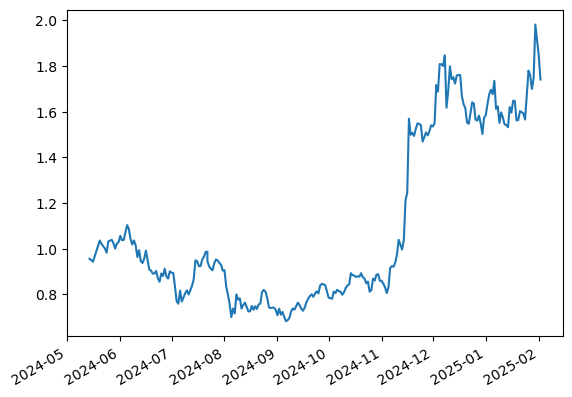

In [45]:
#historical_ptf.dropna(axis = 0, how = 'all', inplace = True)

(1+historical_ptf['Historical Portfolio']).cumprod().plot()

## Ex ante data

In [47]:
ex_ante_ptf=ex_ante_perf.copy()

for key in inventory_weights.keys():
    
    ex_ante_ptf[key]=ex_ante_perf[key]*inventory_weights[key]

ex_ante_ptf=pd.DataFrame(ex_ante_ptf.sum(axis=1))

# Portfolio Optimization

## Class set up

In [50]:
days=0
historical_risk=RiskAnalysis(returns_to_use.iloc[-days:])
current_risk=RiskAnalysis(ex_ante_perf_to_use.iloc[-days:])
num_asset=len(returns_to_use.columns)
num_asset_current=len(ex_ante_perf_to_use.columns)

In [51]:
cash=np.where(returns_to_use.columns=='USDCUSDT')[0][0],np.where(returns_to_use.columns=='FDUSDUSDT')[0][0]
limit_hist=np.where(returns_to_use.columns=='BTCUSDT')[0][0],np.where(returns_to_use.columns=='ETHUSDT')[0][0],np.where(returns_to_use.columns=='SOLUSDT')[0][0],np.where(returns_to_use.columns=='USDCUSDT')[0][0]

## Optimal Portfolio

### Historical results

In [54]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'eq', 'fun': lambda weights: weights[cash[0]]-0.00},
                                                                              
                                                                              {'type': 'eq', 'fun': lambda weights: weights[cash[1]]-0.00}])
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory.iloc[:10].round(4)

,Optimal Weights
OMUSDT,0.4897
XRPUSDT,0.1681
BNBUSDT,0.1224
DEXEUSDT,0.0855
SUIUSDT,0.0621
PEPEUSDT,0.0402
RAYUSDT,0.0247
AAVEUSDT,0.0072
QNTUSDT,0.0000
HBARUSDT,0.0000


In [55]:
opt_weights=historical_risk.optimize(objective="sharpe_ratio",constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit_hist[0]]-0.30}])
                                                         #  ,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                        #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
opt_weights=np.round(opt_weights,6)
inventory=historical_risk.inventory(opt_weights)
inventory.columns=['Optimal Weights']

inventory

,Optimal Weights
OMUSDT,0.448647
BTCUSDT,0.300000
XRPUSDT,0.114292
DEXEUSDT,0.075598
SUIUSDT,0.044353
RAYUSDT,0.012046
PEPEUSDT,0.004022
BNBUSDT,0.001042


### Current results

In [57]:
limit=np.where(ex_ante_perf_to_use.columns=='BTCUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='ETHUSDT')[0][0],np.where(ex_ante_perf_to_use.columns=='SOLUSDT')[0][0]

In [58]:
current_optimal_weights=current_risk.optimize(objective="sharpe_ratio")#,constraints=[{'type': 'ineq', 'fun': lambda weights: weights[limit[0]]-0.40}])
                                                           #,{'type': 'ineq', 'fun': lambda weights: weights[limit[1]]-0.15},
                                                            #{'type': 'ineq', 'fun': lambda weights: weights[limit[2]]-0.15}])
current_optimal_weights=np.round(current_optimal_weights,6)
optimal_ptf_current=current_risk.inventory(current_optimal_weights)
optimal_ptf_current.columns=['Optimal Weights']
optimal_ptf_current

,Optimal Weights
OMUSDT,0.525986
BTCUSDT,0.383402
TRXUSDT,0.090612


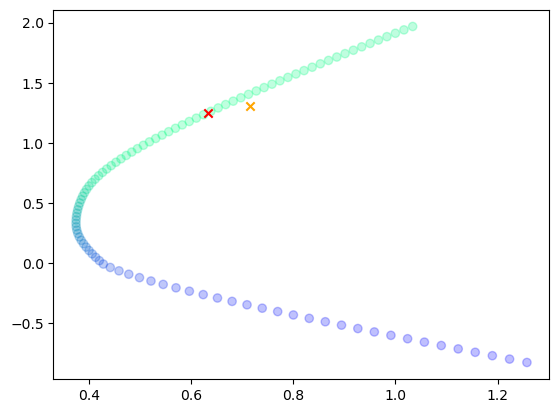

In [59]:
X,Y,Z,C=current_risk.efficient_frontier()

opt_res=current_risk.performance(current_optimal_weights),current_risk.variance(current_optimal_weights)
current_res=current_risk.performance(current_weights),current_risk.variance(current_weights)

plt.scatter(Z,Y,c=C,cmap="winter",alpha=0.25,marker='o')
plt.scatter(opt_res[1],opt_res[0],c='red',marker='x')
plt.scatter(current_res[1],current_res[0],c='orange',marker='x')

## Real Portfolio vs Optimal

In [61]:
current_holding_comparison=holding.copy()
current_holding_comparison=current_holding_comparison.loc[current_holding_comparison.index!="Total"]
current_holding_comparison=pd.concat([current_holding_comparison,optimal_ptf_current],axis=1)
current_holding_comparison=current_holding_comparison.fillna(0)
current_holding_comparison['Spread']=current_holding_comparison['Weights']-current_holding_comparison['Optimal Weights']
current_holding_comparison=current_holding_comparison.round(7)
current_holding_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2618.897209,0.580474,0.525986,0.054488
BTCUSDT,877.059193,0.194399,0.383402,-0.189003
SOLUSDT,369.583265,0.081918,0.000000,0.081918
JASMYUSDT,325.707280,0.072193,0.000000,0.072193
ETHUSDT,187.773236,0.041620,0.000000,0.041620
TRXUSDT,109.794845,0.024336,0.090612,-0.066276
BBUSDT,21.827287,0.004838,0.000000,0.004838
BNBUSDT,1.010467,0.000224,0.000000,0.000224
PEPEUSDT,0.000003,0.000000,0.000000,0.000000


In [62]:
historical_comparison=holding.copy()
historical_comparison=historical_comparison.loc[historical_comparison.index!="Total"]
historical_comparison=pd.concat([historical_comparison,inventory],axis=1)
historical_comparison=historical_comparison.fillna(0)
historical_comparison['Spread']=historical_comparison['Weights']-historical_comparison['Optimal Weights']
historical_comparison=historical_comparison.round(7)
historical_comparison

,Price in USDT,Weights,Optimal Weights,Spread
OMUSDT,2618.897209,0.580474,0.448647,0.131827
BTCUSDT,877.059193,0.194399,0.300000,-0.105601
SOLUSDT,369.583265,0.081918,0.000000,0.081918
JASMYUSDT,325.707280,0.072193,0.000000,0.072193
ETHUSDT,187.773236,0.041620,0.000000,0.041620
TRXUSDT,109.794845,0.024336,0.000000,0.024336
BBUSDT,21.827287,0.004838,0.000000,0.004838
BNBUSDT,1.010467,0.000224,0.001042,-0.000818
PEPEUSDT,0.000003,0.000000,0.004022,-0.004022
XRPUSDT,0.000000,0.000000,0.114292,-0.114292


# Risk Reward Analysis

In [64]:
opt_ptf=(returns_to_use*opt_weights).sum(axis=1)
curr_opt_ptf=(ex_ante_perf*current_optimal_weights).sum(axis=1)
portfolio_perf=pd.DataFrame()
portfolio_perf['Portfolio']=(ex_ante_perf*current_weights).sum(axis=1)

In [65]:
portfolio_perf['Bitcoin']=returns['BTCUSDT']
portfolio_perf['Optimal']=opt_ptf
portfolio_perf['Current Optimal']=curr_opt_ptf

<Axes: >

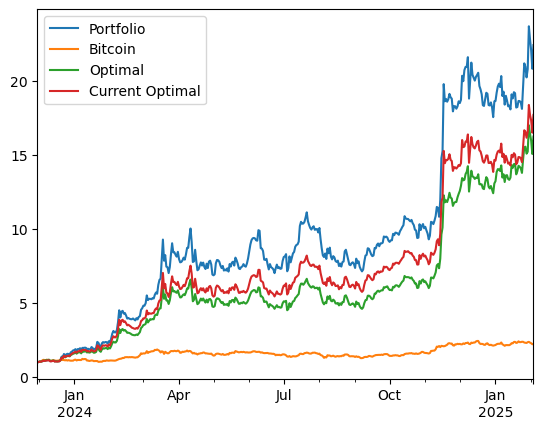

In [66]:
days=0
(1+portfolio_perf.iloc[-days:]).cumprod().plot()

In [67]:
current_perf=portfolio_perf.copy()
current_perf=current_perf.loc[historical_ptf.index]
current_perf['Historical Portfolio']=historical_ptf['Historical Portfolio']

<Axes: >

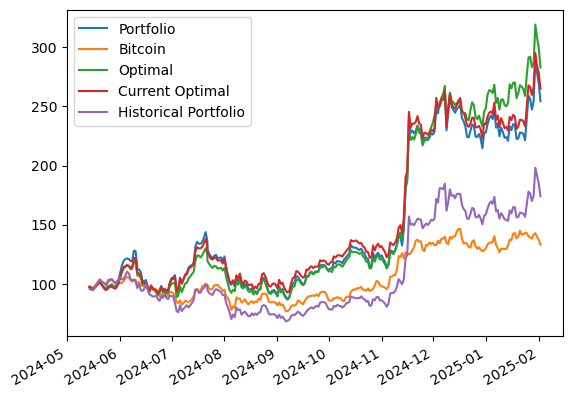

In [68]:
days=0
((1+current_perf.iloc[-days:]).cumprod()*100).plot()

In [69]:
((1+current_perf).cumprod()*100).iloc[-10:]

,Portfolio,Bitcoin,Optimal,Current Optimal,Historical Portfolio
2025-01-24,221.390712,143.102976,258.978288,233.253841,156.577799
2025-01-25,240.614061,142.934147,276.603176,250.917247,167.492235
2025-01-26,258.966825,140.002047,291.370621,267.851862,177.981837
2025-01-27,256.178453,139.267274,292.157741,266.189306,175.966487
2025-01-28,247.366792,138.244001,283.347039,259.726212,169.963707
2025-01-29,254.256201,141.476921,285.846386,266.363629,174.562610
2025-01-30,289.554330,142.820328,319.354984,295.337175,198.187203
2025-01-31,278.651051,139.657879,308.444140,284.410164,191.324410
2025-02-01,269.591359,137.190295,299.750352,278.456064,184.686080
2025-02-02,254.474336,133.129604,282.948225,265.252873,174.094032


## Volatilities

In [71]:
vol=historical_risk.portfolio(opt_weights).std()*np.sqrt(252)
vol_ex_ante=historical_risk.variance(opt_weights)

vol,vol_ex_ante

(Portfolio    0.682812
 dtype: float64,
 0.6835821339670652)

In [72]:
vol=current_risk.portfolio(current_weights).std()*np.sqrt(252)
vol_ex_ante=current_risk.variance(current_weights)
vol,vol_ex_ante

(Portfolio    0.715916
 dtype: float64,
 0.7159159735759478)

In [73]:
portfolio_perf.iloc[1:].std()*np.sqrt(252)

Portfolio          0.824558
Bitcoin            0.426524
Optimal            0.683582
Current Optimal    0.732654
dtype: float64

In [74]:
current_risk.tracking_error(current_risk.returns['BTCUSDT'],current_perf['Historical Portfolio'])

0.4625248535368612

In [75]:
days=120
current_perf['Historical Portfolio'].iloc[-days:].mean()*252/(current_perf['Historical Portfolio'].iloc[-days:].std()*np.sqrt(252))

2.6040560179633045

In [76]:
current_risk.performance(current_weights)/current_risk.variance(current_weights)

1.8216601039456086

## Risk Contribution

In [78]:
perf_analysis=pd.concat([historical_risk.perf_contrib(opt_weights),historical_risk.var_contrib_pct(opt_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
BNBUSDT,0.001213,0.001042,0.000069,0.000289,5.111704e-07,0.000289
BTCUSDT,0.374482,0.300000,0.020509,0.107360,3.503873e-02,0.072321
DEXEUSDT,0.177895,0.075598,0.007708,0.043612,1.043289e-02,0.033179
OMUSDT,30.970447,0.448647,0.955378,0.761888,6.607254e-01,0.101162
PEPEUSDT,0.006715,0.004022,0.000326,0.002746,5.394409e-05,0.002692
RAYUSDT,0.047152,0.012046,0.001800,0.009936,4.214044e-04,0.009515
SUIUSDT,0.079406,0.044353,0.003763,0.023731,3.825871e-03,0.019905
XRPUSDT,0.229233,0.114292,0.010446,0.050439,1.276782e-02,0.037671


In [79]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_optimal_weights),current_risk.var_contrib_pct(current_optimal_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,1.972481,0.525986,0.787311,0.827913,0.738918,0.088995
BTCUSDT,0.171009,0.383402,0.174705,0.131699,0.059493,0.072206
TRXUSDT,0.029929,0.090612,0.037984,0.040387,0.014035,0.026353


In [80]:
perf_analysis=pd.concat([current_risk.perf_contrib(current_weights),current_risk.var_contrib_pct(current_weights)],axis=1)
perf_analysis

,Performance Contribution,Initial Weights,Last Weights,Variance Contribution in %,Idiosyncratic Risk in %,Correlation in %
OMUSDT,2.219425,0.591837,0.853398,0.823812,0.730385,0.093428
BTCUSDT,0.086475,0.193878,0.085105,0.057712,0.011877,0.045835
SOLUSDT,0.008952,0.081633,0.027498,0.043358,0.005762,0.037595
JASMYUSDT,-0.018602,0.071429,0.016036,0.054461,0.012328,0.042133
ETHUSDT,-0.008794,0.040816,0.009721,0.014018,0.000980,0.013037
TRXUSDT,0.006741,0.020408,0.008241,0.006639,0.000556,0.006084


# Value At Risk

## Historical

### Optimal Weights

In [84]:
var,cvar=historical_risk.historical_var(opt_weights)
(var,cvar)

(-0.052123811372339124, -0.07826209820360581)

### Current Weights

In [86]:
var,cvar=current_risk.historical_var(current_weights)
(var,cvar)

(-0.05153621881767842, -0.07583220179662171)

In [87]:
historical_var=current_risk.returns*current_weights
historical_var['Portfolio']=historical_var.sum(axis=1)
historical_var=historical_var.sort_values(by='Portfolio')
centile=0.05
row=round(historical_var.shape[0]*centile)

In [88]:
var=historical_var.iloc[row]
var

OMUSDT      -0.031950
BTCUSDT     -0.004312
SOLUSDT     -0.005868
JASMYUSDT   -0.007885
ETHUSDT     -0.001562
TRXUSDT     -0.000249
BBUSDT      -0.000000
BNBUSDT     -0.000000
PEPEUSDT    -0.000000
Portfolio   -0.051826
Name: 2024-10-25 00:00:00, dtype: float64

In [89]:
cvar=historical_var.iloc[:row+1].mean()
cvar

OMUSDT      -0.057977
BTCUSDT     -0.005122
SOLUSDT     -0.004388
JASMYUSDT   -0.005935
ETHUSDT     -0.001753
TRXUSDT     -0.000658
BBUSDT       0.000000
BNBUSDT      0.000000
PEPEUSDT     0.000000
Portfolio   -0.075832
dtype: float64

## Parametric

### Optimal Weights

In [92]:
var,cvar=historical_risk.parametric_var(opt_weights)

(var,cvar)

(-0.07083007308564992, -0.09078457026518934)

### Current Weights

In [94]:
var,cvar=current_risk.parametric_var(current_weights)

(var,cvar)

(-0.07418037747313583, -0.09507873418208508)

## Multivariate

### Optimal Weights

In [97]:
perf=performance(historical_risk.multivariate_distribution(),opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06597093035674115, -0.08384301563789565)

### Current Weights

In [99]:
perf=performance(current_risk.multivariate_distribution(),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()
(var,cvar)

(-0.06916452461420704, -0.08739740426927449)

In [100]:
scenario_multivariate={}

for i in range(50):
    multivariate_distrib=pd.DataFrame(current_risk.multivariate_distribution(),columns=current_risk.returns.columns)
    multivariate_distrib=multivariate_distrib*current_weights
    multivariate_distrib=multivariate_distrib[multivariate_distrib.columns[current_weights>0]]

    multivariate_distrib['Portfolio']=multivariate_distrib.sum(axis=1)
    multivariate_var=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]['Portfolio']
    results=multivariate_distrib.sort_values(by='Portfolio').iloc[int(multivariate_distrib.shape[0]*0.05)]

    scenario_multivariate[i]=results.to_dict()

mean_scenario_multivariate=pd.DataFrame(scenario_multivariate).T.mean()
mean_scenario_multivariate

OMUSDT      -0.059820
BTCUSDT     -0.002361
SOLUSDT     -0.002270
JASMYUSDT   -0.003264
ETHUSDT     -0.000660
TRXUSDT     -0.000461
Portfolio   -0.068835
dtype: float64

## Copulas

## Gaussian Copula

### Optimal Weights

In [104]:
cop=historical_risk.gaussian_copula()
perf=performance(cop,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.062176552858115734, -0.08015248561124833)

### Current Weights

In [106]:
cop=current_risk.gaussian_copula()
perf=performance(cop,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06990894649697282, -0.08821554605059102)

In [107]:
scenario_gaussian={}

for i in range(100):
    gaussian_copula_distrib=pd.DataFrame(current_risk.gaussian_copula(),columns=current_risk.returns.columns)

    gaussian_copula_distrib=gaussian_copula_distrib*current_weights
    gaussian_copula_distrib=gaussian_copula_distrib[gaussian_copula_distrib.columns[current_weights>0]]

    gaussian_copula_distrib['Portfolio']=gaussian_copula_distrib.sum(axis=1)
    gaussian_var=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gaussian_copula_distrib.sort_values(by='Portfolio').iloc[int(gaussian_copula_distrib.shape[0]*0.05)]
    
    scenario_gaussian[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gaussian).T.mean()
mean_scenario_gaussian

OMUSDT      -0.054571
BTCUSDT     -0.004439
SOLUSDT     -0.003175
JASMYUSDT   -0.004962
ETHUSDT     -0.001309
TRXUSDT     -0.000464
Portfolio   -0.068921
dtype: float64

## Student Copula

### Optimal Weights

In [110]:
t_copula=historical_risk.t_copula()
perf=performance(t_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.06389813422852478, -0.08180507722639695)

### Current Weights

In [112]:
t_copula=current_risk.t_copula()
perf=performance(t_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07071411420366625, -0.09118694960060741)

In [113]:
scenario_t_copula={}

for i in range(100):
    
    t_copula_distrib=pd.DataFrame(current_risk.t_copula(),columns=current_risk.returns.columns)
    t_copula_distrib=t_copula_distrib*current_weights
    t_copula_distrib=t_copula_distrib[t_copula_distrib.columns[current_weights>0]]
    t_copula_distrib['Portfolio']=t_copula_distrib.sum(axis=1)
    t_copula_var=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=t_copula_distrib.sort_values(by='Portfolio').iloc[int(t_copula_distrib.shape[0]*0.05)]
    
    scenario_t_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_t_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.057352
BTCUSDT     -0.004255
SOLUSDT     -0.003206
JASMYUSDT   -0.004009
ETHUSDT     -0.001144
TRXUSDT     -0.000541
Portfolio   -0.070507
dtype: float64

## Gumbel Copula

### Optimal Weights

In [116]:
gumbel_copula=historical_risk.gumbel_copula()
perf=performance(gumbel_copula,opt_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.12433154313086026, -0.18033700146547055)

### Current Weights

In [118]:
gumbel_copula=current_risk.gumbel_copula(theta=2)
perf=performance(gumbel_copula,current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.13568055753132055, -0.19270439339096584)

In [119]:
scenario_gumbel_copula={}

for i in range(100):
    
    gumbel_copula_distrib=pd.DataFrame(current_risk.gumbel_copula(),columns=current_risk.returns.columns)
    gumbel_copula_distrib=gumbel_copula_distrib*current_weights
    gumbel_copula_distrib=gumbel_copula_distrib[gumbel_copula_distrib.columns[current_weights>0]]
    gumbel_copula_distrib['Portfolio']=gumbel_copula_distrib.sum(axis=1)
    gumbel_copula_var=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]['Portfolio']
    results=gumbel_copula_distrib.sort_values(by='Portfolio').iloc[int(gumbel_copula_distrib.shape[0]*0.05)]
    
    scenario_gumbel_copula[i]=results
    
mean_scenario_gaussian=pd.DataFrame(scenario_gumbel_copula).T.mean()
mean_scenario_gaussian

OMUSDT      -0.132858
BTCUSDT     -0.000300
SOLUSDT     -0.002500
JASMYUSDT   -0.001312
ETHUSDT     -0.000373
TRXUSDT     -0.000110
Portfolio   -0.137453
dtype: float64

## Monte Carlo

### Optimal

In [122]:
spot=data[with_no_na].iloc[-1]
monte_carlo=historical_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),opt_weights)

In [123]:
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.07248426696829706, -0.09103709474483315)

### Current Weights

In [125]:
spot=data[ex_ante_perf.columns].iloc[-1]
monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
perf=performance(monte_carlo[1].fillna(0),current_weights)
var=np.percentile(perf,5)
cvar=perf[perf<var].mean()

var,cvar

(-0.0740818585232393, -0.09297409923647498)

In [126]:
spot=data[ex_ante_perf.columns].iloc[-1]

scenario_monte_carlo={}

for i in range(100):
    
    monte_carlo=current_risk.monte_carlo(spot,horizon=1/250,stress_factor=1.0)
    monte_carlo_distrib=monte_carlo[1].fillna(0)*current_weights
    monte_carlo_distrib=monte_carlo_distrib[monte_carlo_distrib.columns[current_weights>0]]
    monte_carlo_distrib['Portfolio']=monte_carlo_distrib.sum(axis=1)
    monte_carlo_var=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]['Portfolio']
    results=monte_carlo_distrib.sort_values(by='Portfolio').iloc[int(monte_carlo_distrib.shape[0]*0.05)]
    
    scenario_monte_carlo[i]=results
    
mean_scenario_monte_carlo=pd.DataFrame(scenario_monte_carlo).T.mean()
mean_scenario_monte_carlo

OMUSDT      -0.062395
BTCUSDT     -0.004436
SOLUSDT     -0.003195
JASMYUSDT   -0.004198
ETHUSDT     -0.001175
TRXUSDT     -0.000397
Portfolio   -0.075795
dtype: float64

## VaR Violation

In [128]:
var_data=rolling_var(returns_to_use,opt_weights,window=30,Q=1)
var_data

,Historical,Parametric,Multivariate,Portfolio
2024-01-14,-0.059980,-0.107204,-0.091613,-0.021309
2024-01-15,-0.059980,-0.107203,-0.089238,0.015248
2024-01-16,-0.059980,-0.107215,-0.091983,0.050354
2024-01-17,-0.059980,-0.109104,-0.088092,-0.030881
2024-01-18,-0.059980,-0.111562,-0.092231,-0.038983
...,...,...,...,...
2025-01-30,-0.055057,-0.083960,-0.075049,0.117226
2025-01-31,-0.055057,-0.085963,-0.075902,-0.034165
2025-02-01,-0.055057,-0.085572,-0.081231,-0.028186
2025-02-02,-0.057035,-0.089335,-0.085006,-0.056054


In [129]:
current_var_data=rolling_var(ex_ante_perf_to_use,current_weights,window=15,Q=1)
current_var_data

,Historical,Parametric,Multivariate,Portfolio
2024-05-28,-0.040644,-0.083850,-0.081243,-0.015749
2024-05-29,-0.040644,-0.081589,-0.077383,-0.007484
2024-05-30,-0.040644,-0.071308,-0.070857,0.029498
2024-05-31,-0.040644,-0.074192,-0.069890,0.044317
2024-06-01,-0.040644,-0.079288,-0.071647,0.060138
...,...,...,...,...
2025-01-30,-0.048388,-0.116995,-0.103310,0.138829
2025-01-31,-0.048845,-0.120087,-0.111492,-0.037655
2025-02-01,-0.048845,-0.123111,-0.112453,-0.032513
2025-02-02,-0.055317,-0.129308,-0.119252,-0.056074


<Axes: >

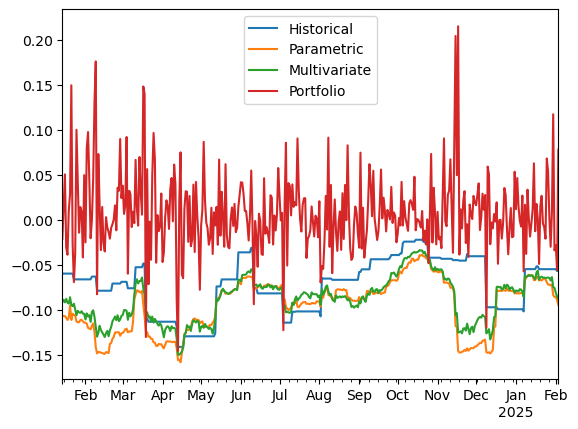

In [130]:
var_data.plot()

<Axes: >

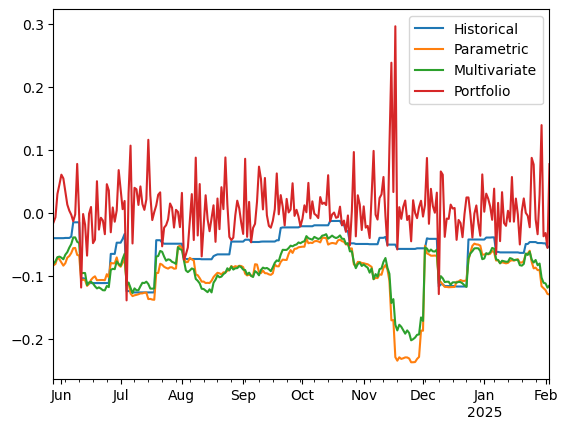

In [131]:
current_var_data.plot()

In [132]:
kupiec_test(var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.02584,0.010336,0.010336
Kupiec Stat,5.73365,18.720966,18.720966
P-value,0.016643,0.000015,0.000015


In [133]:
kupiec_test(current_var_data)

,Historical,Parametric,Multivariate
Proportion of failure,0.059524,0.015873,0.011905
Kupiec Stat,0.454743,8.326085,10.96941
P-value,0.500091,0.003908,0.000926


# Principal Component Analysis

## Historical PCA

In [136]:
eigval,eigvec,portfolio_components=historical_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.7822379 , 0.06878342, 0.05839978, 0.05013115, 0.04044776])

In [137]:
pca_weight=dict((portfolio_components['PC1']/portfolio_components['PC1'].sum()))
portfolio_components['PC1']

AAVEUSDT    0.016181
ADAUSDT     0.016152
ALGOUSDT    0.018549
APTUSDT     0.016768
ARBUSDT     0.017973
              ...   
WBTCUSDT    0.009194
WLDUSDT     0.022731
XLMUSDT     0.013342
XRPUSDT     0.011490
XTZUSDT     0.016661
Name: PC1, Length: 61, dtype: float64

<Axes: >

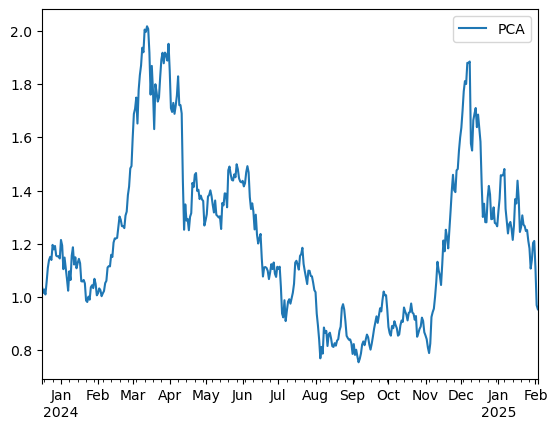

In [138]:
historical_PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(historical_risk.returns)),
                 index=historical_risk.returns.index,
                 columns=['PCA'])
historical_PCA=historical_PCA.dropna()
(1+historical_PCA).cumprod().plot()

<Axes: >

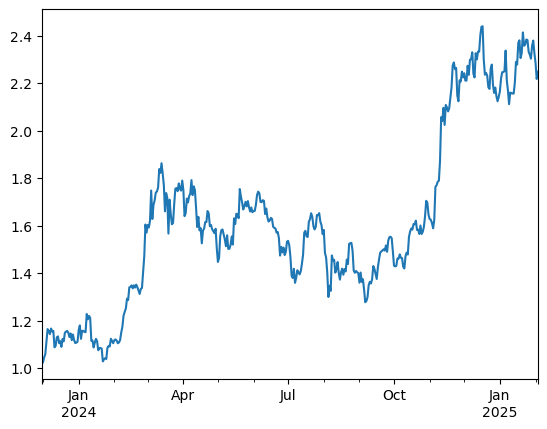

In [139]:
(1+historical_risk.returns['BTCUSDT']).cumprod().plot()

In [140]:
comparison=historical_risk.returns.copy()
comparison['PCA']=historical_PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-historical_PCA['PCA'])**2))).sort_values()
distances[:20]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
FLOWUSDT     0.427064
WBETHUSDT    0.440596
ETHUSDT      0.440823
ATOMUSDT     0.462614
DOTUSDT      0.463908
ETCUSDT      0.471507
NEXOUSDT     0.477750
ADAUSDT      0.506774
WBTCUSDT     0.523578
BTCUSDT      0.524215
EOSUSDT      0.529167
AVAXUSDT     0.529285
IOTAUSDT     0.557387
FILUSDT      0.560620
ARBUSDT      0.570545
GRTUSDT      0.579704
XTZUSDT      0.586865
LINKUSDT     0.597483
SOLUSDT      0.603526
dtype: float64

<Axes: >

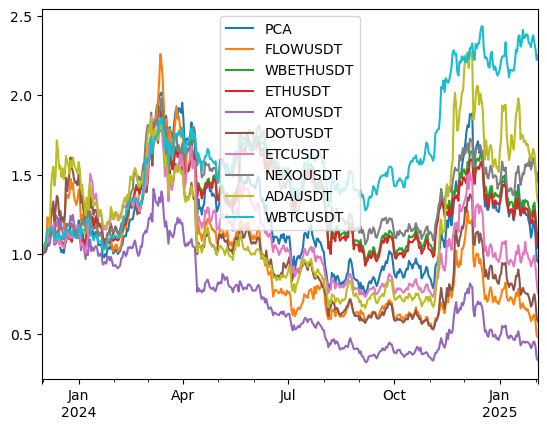

In [141]:
(1+comparison[distances.index[:10]]).cumprod().plot()

<Axes: >

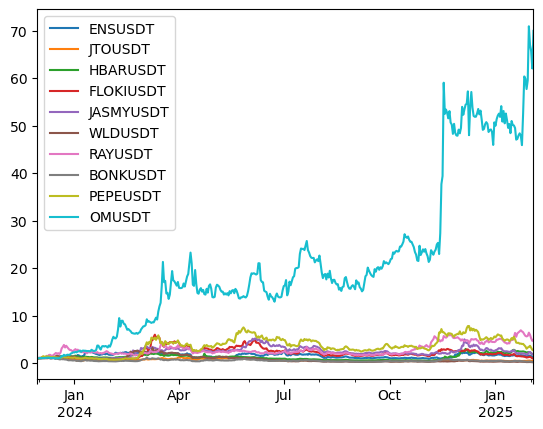

In [142]:
(1+comparison[distances.index[-10:]]).cumprod().plot()

## Current PCA

In [144]:
eigval,eigvec,portfolio_components_current=current_risk.pca(num_components=5)
variance_explained=eigval/eigval.sum()
variance_explained

array([0.5665374 , 0.14718335, 0.11926113, 0.09586195, 0.07115617])

In [145]:
pca_weight=dict((portfolio_components_current['PC1']/portfolio_components_current['PC1'].sum()))
portfolio_components_current['PC1']

OMUSDT       0.093309
BTCUSDT      0.059046
SOLUSDT      0.097375
JASMYUSDT    0.175988
ETHUSDT      0.084904
TRXUSDT      0.056280
BBUSDT       0.207641
BNBUSDT      0.065223
PEPEUSDT     0.160234
Name: PC1, dtype: float64

<Axes: >

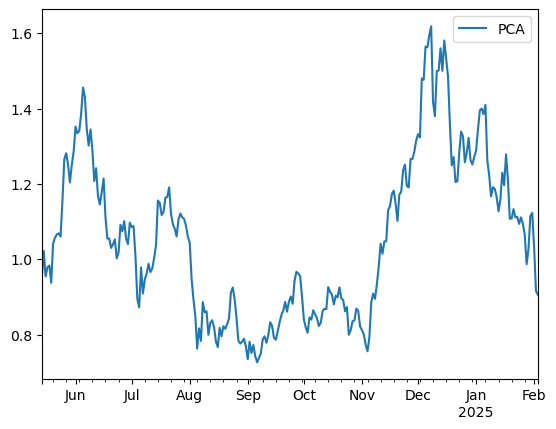

In [146]:
PCA=pd.DataFrame(np.array(list(pca_weight.values())).dot(np.transpose(current_risk.returns)),
                 index=current_risk.returns.index,
                 columns=['PCA'])
PCA=PCA.dropna()
(1+PCA).cumprod().plot()

<Axes: >

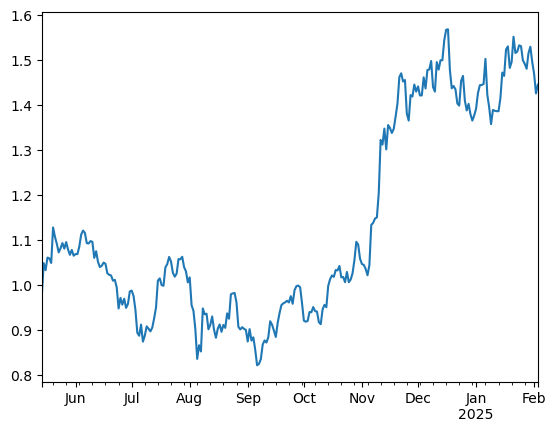

In [147]:
(1+current_risk.returns['BTCUSDT']).cumprod().plot()

In [148]:
comparison=current_risk.returns.copy()
comparison['PCA']=PCA
distances=np.sqrt(np.sum(comparison.apply(lambda y:(y-PCA['PCA'])**2))).sort_values()
distances.iloc[:10]

C:\Users\niroo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PCA          0.000000
ETHUSDT      0.433915
BNBUSDT      0.465835
BTCUSDT      0.489301
SOLUSDT      0.491527
JASMYUSDT    0.690058
PEPEUSDT     0.743231
BBUSDT       0.773690
TRXUSDT      0.899960
OMUSDT       0.971710
dtype: float64

<Axes: >

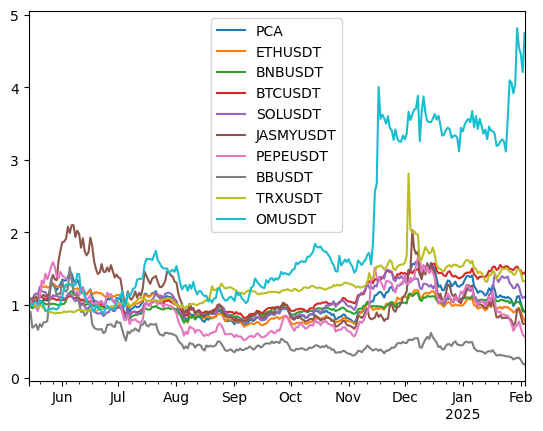

In [149]:
(1+comparison[distances.index[:10]]).cumprod().plot()

## Sensitivity Analysis

In [151]:
beta=(ex_ante_perf.cov()/ex_ante_perf.var())['BTCUSDT'].sort_values(ascending=False)
beta

PEPEUSDT     1.909313
BBUSDT       1.576588
JASMYUSDT    1.333967
SOLUSDT      1.161919
BTCUSDT      1.000000
ETHUSDT      0.971815
OMUSDT       0.877761
BNBUSDT      0.662376
TRXUSDT      0.326805
Name: BTCUSDT, dtype: float64

In [152]:
days=30
beta=(ex_ante_perf.iloc[-days:].cov()/ex_ante_perf.iloc[-days:].var())['BTCUSDT'].sort_values(ascending=False)
beta

JASMYUSDT    2.289535
PEPEUSDT     2.033586
BBUSDT       1.994117
SOLUSDT      1.343789
ETHUSDT      1.143980
TRXUSDT      1.082443
BTCUSDT      1.000000
OMUSDT       0.862376
BNBUSDT      0.657571
Name: BTCUSDT, dtype: float64

### Multilinear Regression

In [154]:
reg=ex_ante_perf.copy().dropna()
reg=reg.iloc[-30:]
reg['PCA']=historical_PCA
X=reg.iloc[:,reg.columns!='PCA'].to_numpy()
Y=reg['PCA'].to_numpy()
columns=list(reg.columns[reg.columns!='PCA'])

beta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [155]:
table=pd.DataFrame(dict(zip(columns,beta)).values(),index=dict(zip(columns,beta)).keys(),columns=['Beta'])
table.sort_values(by='Beta',ascending=False)

,Beta
BTCUSDT,0.302945
BBUSDT,0.256265
TRXUSDT,0.187782
PEPEUSDT,0.149776
ETHUSDT,0.088817
SOLUSDT,0.068896
JASMYUSDT,0.062806
BNBUSDT,0.060628
OMUSDT,0.021122


### Regression to PCA

In [157]:
reg=ex_ante_perf.copy().dropna()
reg=reg.loc[historical_ptf['Historical Portfolio'].index]

reg['PCA']=historical_PCA
reg['Portfolio']=historical_ptf['Historical Portfolio']
reg=reg.iloc[-30:]
X=reg['PCA'].to_numpy()
Y=reg['Portfolio'].to_numpy()
columns=list(reg.columns[reg.columns!='Porfolio'])

beta=reg.cov()['Portfolio']['PCA']/reg.var()['Portfolio']
beta

0.8045291004269317

In [158]:
reg=ex_ante_perf.copy().dropna()
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BTCUSDT      1.303789
BNBUSDT      1.186512
ETHUSDT      1.021767
PCA          1.000000
SOLUSDT      0.756838
JASMYUSDT    0.436919
PEPEUSDT     0.417366
BBUSDT       0.383804
TRXUSDT      0.254681
OMUSDT       0.239645
dtype: float64

In [159]:
reg=ex_ante_perf.copy().dropna().iloc[-30:]
reg['PCA']=historical_PCA

(reg.cov()['PCA']/reg.var()).sort_values(ascending=False)

BNBUSDT      1.928903
BTCUSDT      1.717149
ETHUSDT      1.176908
TRXUSDT      1.167363
PCA          1.000000
BBUSDT       0.703486
PEPEUSDT     0.656983
JASMYUSDT    0.526678
SOLUSDT      0.475270
OMUSDT       0.300114
dtype: float64

### Correlation Matrix

<Axes: >

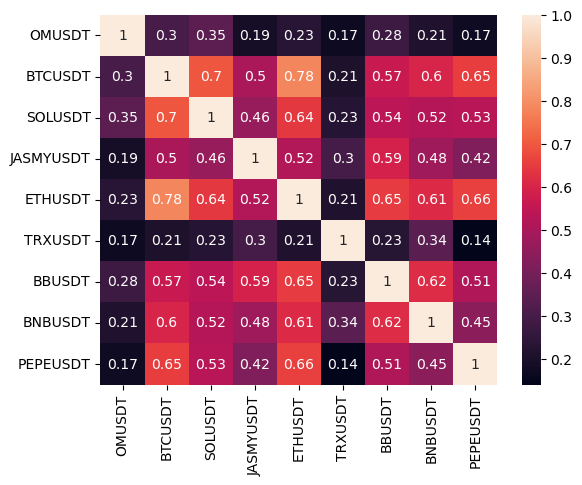

In [161]:
sns.heatmap(ex_ante_perf.corr(),annot=True)

<Axes: >

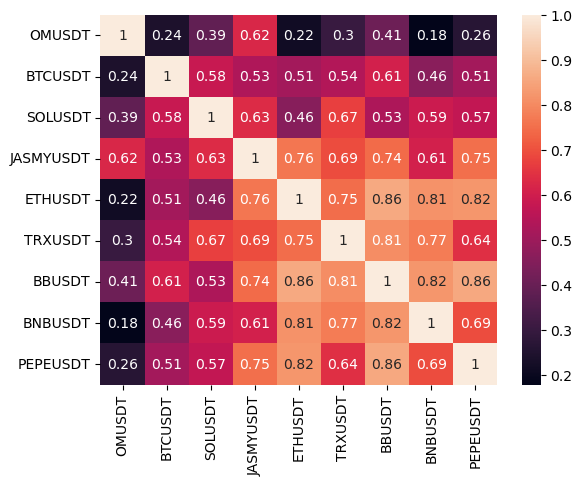

In [162]:
sns.heatmap(ex_ante_perf.iloc[-15:].corr(),annot=True)

## Sliding window optimization

In [164]:
results={}
window=14

for i in range(0,ex_ante_perf_to_use.shape[0]-window+1,window):
    
    try:
        dataset=ex_ante_perf_to_use.iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio')     
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=ex_ante_perf_to_use.columns).T
rolling_optimization

,OMUSDT,BTCUSDT,SOLUSDT,JASMYUSDT,ETHUSDT,TRXUSDT,BBUSDT,BNBUSDT,PEPEUSDT
2024-05-27,0.000000,0.000000,0.000000,0.621968,0.000000,0.000000,0.000000,0.000000,0.378032
2024-06-10,0.625939,0.000000,0.000000,0.150852,0.000000,0.223209,0.000000,0.000000,0.000000
2024-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-07-08,0.182528,0.000000,0.000000,0.000000,0.000000,0.817472,0.000000,0.000000,0.000000
2024-07-22,0.133242,0.414562,0.112009,0.000000,0.000000,0.340186,0.000000,0.000000,0.000000
2024-08-05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-08-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.926694,0.000000,0.073306,0.000000
2024-09-02,0.435138,0.000000,0.000000,0.000000,0.000000,0.564862,0.000000,0.000000,0.000000
2024-09-16,0.287440,0.000000,0.000000,0.000000,0.000000,0.000000,0.712560,0.000000,0.000000
2024-09-30,0.176666,0.000000,0.000000,0.000000,0.165949,0.527049,0.000000,0.000000,0.130336


In [165]:
results={}
window=30
days=250
limit=np.where(returns_to_use.columns=='USDCUSDT')[0][0]

for i in range(0,returns_to_use.shape[0]-window+1,window):
    
    try:
        dataset=returns_to_use.iloc[-days:].iloc[i:i+window]
        risk=RiskAnalysis(dataset)
        date=dataset.index[-1]
        optimal=risk.optimize(objective='sharpe_ratio',constraints=[{'type': 'eq', 'fun': lambda weights: weights[limit]-0.0}])
        results[date]=np.round(optimal,6)
        
    except Exception as e:
        
            pass

rolling_optimization=pd.DataFrame(results,index=returns_to_use.columns).T
rolling_optimization

,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBETHUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT,XTZUSDT
2024-06-28,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.952499,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2024-07-28,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.687550,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.094736,0.0
2024-08-27,0.990055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009945,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2024-09-26,0.117914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2024-10-26,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.698574,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2024-11-25,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.13488,0.200094,0.0
2024-12-25,0.873315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0
2025-01-24,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.482283,0.0
2025-02-03,0.007546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0


In [166]:
rolling_optimization.iloc[-1].sort_values(ascending=False)[:6]

OMUSDT      0.992454
AAVEUSDT    0.007546
JTOUSDT     0.000000
LINKUSDT    0.000000
LTCUSDT     0.000000
MKRUSDT     0.000000
Name: 2025-02-03 00:00:00, dtype: float64